📁 Upload your NBA dataset CSV (2020–2025)


Saving nba_traditional_RS_2020_2025.csv to nba_traditional_RS_2020_2025 (1).csv
✅ Top defenders file saved: top_defenders_per_year_2020_25.csv


/tmp/ipython-input-4269167876.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_defenders_per_year = df_filtered.groupby("Year").apply(
/tmp/ipython-input-4269167876.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DEF_SCORE", y="PLAYER", data=year_data, palette="Blues_d", ax=axes[i])
/tmp/ipython-input-4269167876.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DEF_SCORE", y="PL

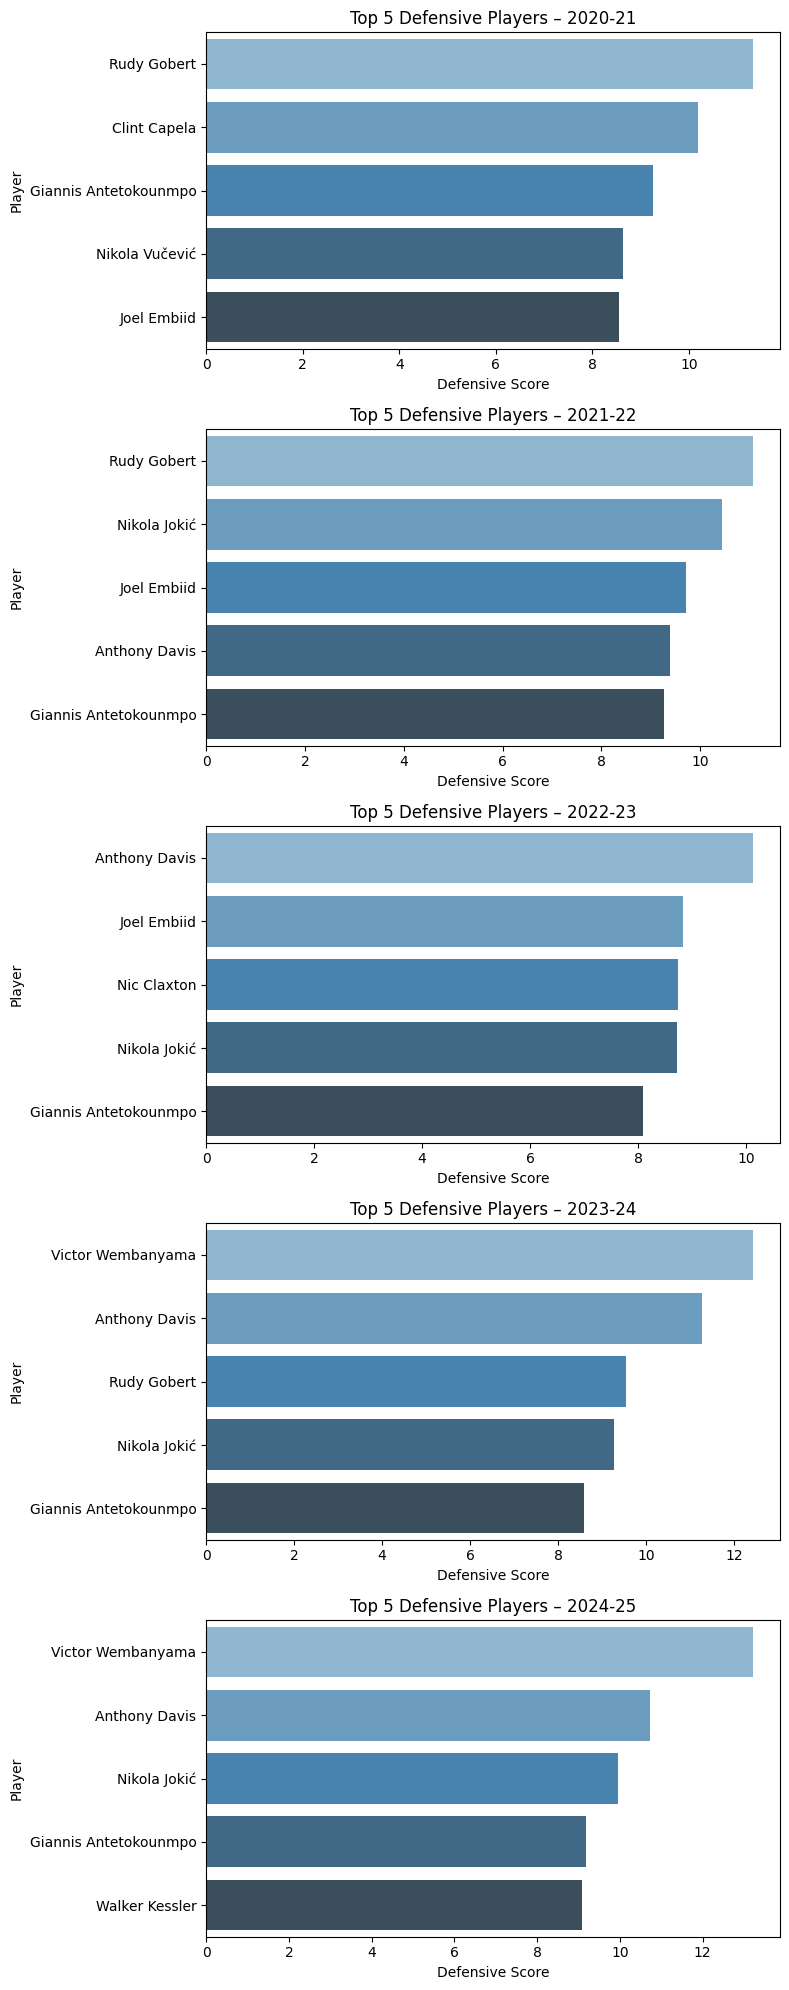

✅ All-time defenders file saved: top_defenders_alltime_2020_25.csv


/tmp/ipython-input-4269167876.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DEF_SCORE", y=alltime_defenders.index, data=alltime_defenders, palette="Greens_d")


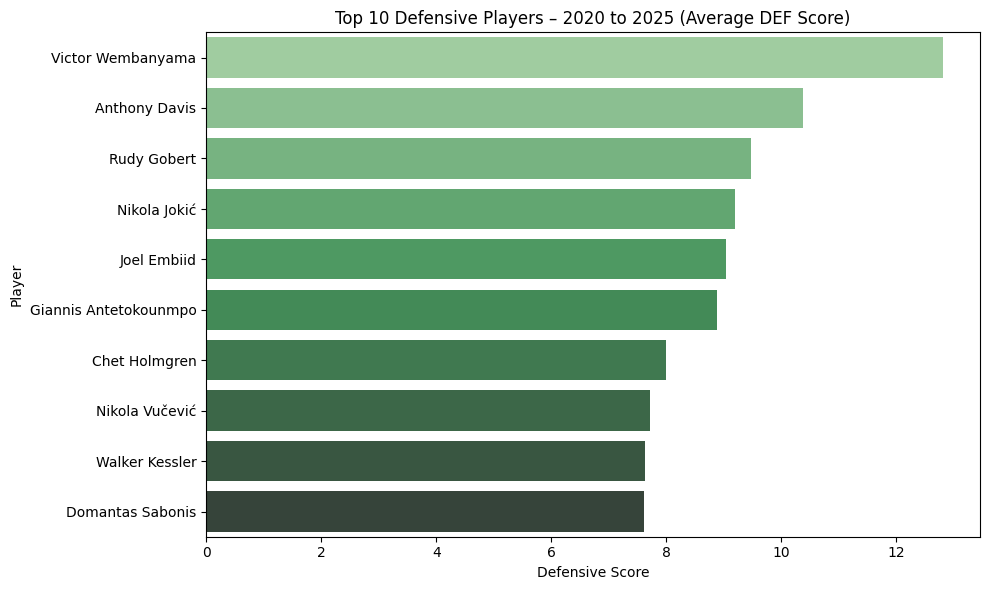

In [3]:
# 📓 Defense-Only Player Evaluation – 2020–2025
# 🏀 Statline Project

# 🟦 Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 🟦 Step 2: Upload your file
print("📁 Upload your NBA dataset CSV (2020–2025)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 🟦 Step 3: Load dataset
df = pd.read_csv(filename)
df.columns = df.columns.str.strip()

# 🟦 Step 4: Create per-game stats
df["STL_G"] = df["STL"] / df["GP"]
df["BLK_G"] = df["BLK"] / df["GP"]
df["DREB_G"] = df["DREB"] / df["GP"]
df["PF_G"] = df["PF"] / df["GP"]

# 🟦 Step 5: Apply filters for valid defensive sample
df_filtered = df[
    (df["GP"] >= 40) &      # Must play most of the season
    (df["MIN"] >= 20)       # Must play consistent minutes
].copy()

# 🟦 Step 6: Calculate Defensive Score
df_filtered["DEF_SCORE"] = (
    (df_filtered["STL_G"] * 1.5) +
    (df_filtered["BLK_G"] * 1.5) +
    (df_filtered["DREB_G"] * 0.75) -
    (df_filtered["PF_G"] * 0.5)
)

# 🟦 Step 7: Rank Top 5 defenders per season
top_defenders_per_year = df_filtered.groupby("Year").apply(
    lambda x: x.sort_values(by="DEF_SCORE", ascending=False).head(5)
).reset_index(drop=True)

# 🟦 Step 8: Save results for all seasons
top_defenders_per_year.to_csv("top_defenders_per_year_2020_25.csv", index=False)
print("✅ Top defenders file saved: top_defenders_per_year_2020_25.csv")

# 🟦 Step 9: Visualization – Top 5 defenders for each year
years = sorted(df_filtered["Year"].unique())
fig, axes = plt.subplots(len(years), 1, figsize=(8, len(years) * 4))

for i, year in enumerate(years):
    year_data = top_defenders_per_year[top_defenders_per_year["Year"] == year]
    sns.barplot(x="DEF_SCORE", y="PLAYER", data=year_data, palette="Blues_d", ax=axes[i])
    axes[i].set_title(f"Top 5 Defensive Players – {year}")
    axes[i].set_xlabel("Defensive Score")
    axes[i].set_ylabel("Player")

plt.tight_layout()
plt.savefig("top5_defenders_per_year_2020_25.jpg", dpi=300)
plt.show()

# 🟦 Step 10: Combined All-Time (2020–2025) Leaderboard
alltime_defenders = df_filtered.groupby("PLAYER").agg({
    "GP": "sum",
    "STL": "sum",
    "BLK": "sum",
    "DREB": "sum",
    "PF": "sum",
    "DEF_SCORE": "mean"  # average per season
}).sort_values(by="DEF_SCORE", ascending=False).head(10)

alltime_defenders.to_csv("top_defenders_alltime_2020_25.csv")
print("✅ All-time defenders file saved: top_defenders_alltime_2020_25.csv")

# 🟦 Step 11: Visualize All-Time Top 10
plt.figure(figsize=(10,6))
sns.barplot(x="DEF_SCORE", y=alltime_defenders.index, data=alltime_defenders, palette="Greens_d")
plt.title("Top 10 Defensive Players – 2020 to 2025 (Average DEF Score)")
plt.xlabel("Defensive Score")
plt.ylabel("Player")
plt.tight_layout()
plt.savefig("top10_defenders_alltime_2020_25.jpg", dpi=300)
plt.show()